In [54]:
%matplotlib inline


# Preços de Apartamentos no Rio
Usar Regressão Linear para predizer o preço do metro quadrado de um apartamento em bairros cariocas.

In [35]:
from random import seed
# fixar a semente para que os resultados sejam repetíveis
seed(42)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor

## Análise dos Dados

In [4]:
# Carregar o conjunto de dados de aptos
aptos = pd.read_csv('aptos.csv', delimiter=',')


In [5]:
aptos.head()

,condominio,quartos,suites,vagas,area,bairro,preco,pm2
0,350,1,0.0,1.0,21,Botafogo,340000,16190.48
1,800,1,0.0,1.0,64,Botafogo,770000,12031.25
2,674,1,0.0,1.0,61,Botafogo,600000,9836.07
3,700,1,1.0,1.0,70,Botafogo,700000,10000.00
4,440,1,0.0,1.0,44,Botafogo,515000,11704.55


In [6]:
#verificando se há anotações nulas
limpo = aptos.dropna()
print('Qtde de linhas com alguma anotação nula: %d' %(aptos.shape[0]-limpo.shape[0]))

Qtde de linhas com alguma anotação nula: 0


In [7]:
aptos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 8 columns):
condominio    1997 non-null int64
quartos       1997 non-null int64
suites        1997 non-null float64
vagas         1997 non-null float64
area          1997 non-null int64
bairro        1997 non-null object
preco         1997 non-null int64
pm2           1997 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 124.9+ KB


### Ajuste dos tipos de dados

In [8]:
aptos[['condominio','area','preco']]=aptos[['condominio','area','preco']].astype(np.float64) 
aptos[['quartos','suites','vagas']]=aptos[['quartos','suites','vagas']].astype('category') 
aptos['bairro'] = aptos['bairro'].astype('category')
aptos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 8 columns):
condominio    1997 non-null float64
quartos       1997 non-null category
suites        1997 non-null category
vagas         1997 non-null category
area          1997 non-null float64
bairro        1997 non-null category
preco         1997 non-null float64
pm2           1997 non-null float64
dtypes: category(4), float64(4)
memory usage: 71.1 KB


In [24]:
# Conhecer o conjunto de dados
aptos.describe()

,condominio,area,preco,pm2
count,1997.000000,1997.000000,1.997000e+03,1997.00000
mean,971.087631,90.051577,1.229410e+06,13256.74635
std,653.893691,46.417486,1.155809e+06,6977.37614
min,1.000000,19.000000,1.300000e+05,2600.00000
25%,550.000000,60.000000,5.600000e+05,7894.74000
50%,800.000000,80.000000,9.000000e+05,11904.76000
75%,1200.000000,110.000000,1.550000e+06,17156.86000
max,7071.000000,475.000000,1.360000e+07,76666.67000


### Quantidades de amostras por bairro.

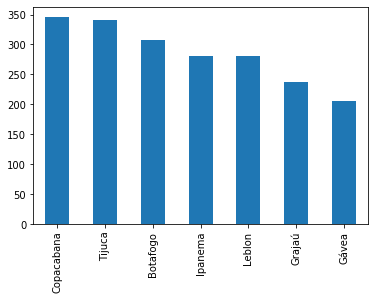

In [9]:
aptos['bairro'].value_counts().plot.bar()
plt.show()

### Médias de preços por quartos, suítes, vagas e bairro
Note que quarto tem pouca variabilidade. Vagas, embora tenha mais variabilidade, é bastante heterogênea para 3 e quatro vagas (intervalo de confiança muito grande). Já em bairros se percebe as faixas de preços por bairros mais e menos nobres.

/Users/rodrigosantos/Library/Python/3.7/lib/python/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/rodrigosantos/Library/Python/3.7/lib/python/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/rodrigosantos/Library/Python/3.7/lib/python/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequenc

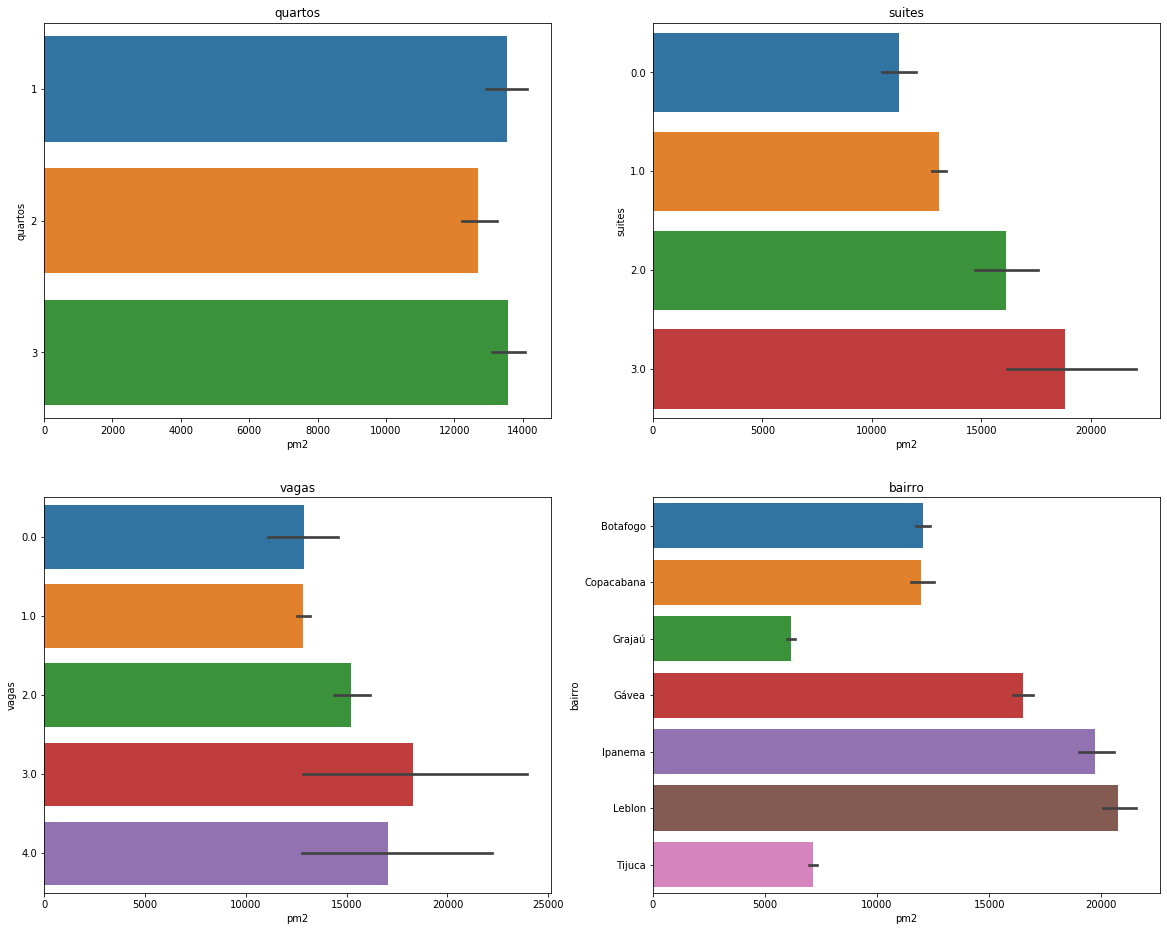

In [10]:
plt.figure(figsize=(20, 16))
ax=plt.subplot(221)
sns.barplot(x='pm2', y='quartos', data=aptos, orient=1)
plt.title('quartos')
ax=plt.subplot(222)
sns.barplot(x='pm2', y='suites', data=aptos, orient=1)
plt.title('suites')
ax=plt.subplot(223)
sns.barplot(x='pm2', y='vagas', data=aptos, orient=1)
plt.title('vagas')
ax=plt.subplot(224)
sns.barplot(x='pm2', y='bairro', data=aptos, orient=1)
plt.title('bairro')
plt.show()

### Boxplots mostrando a grande quantidade de outliers em quase todas as features

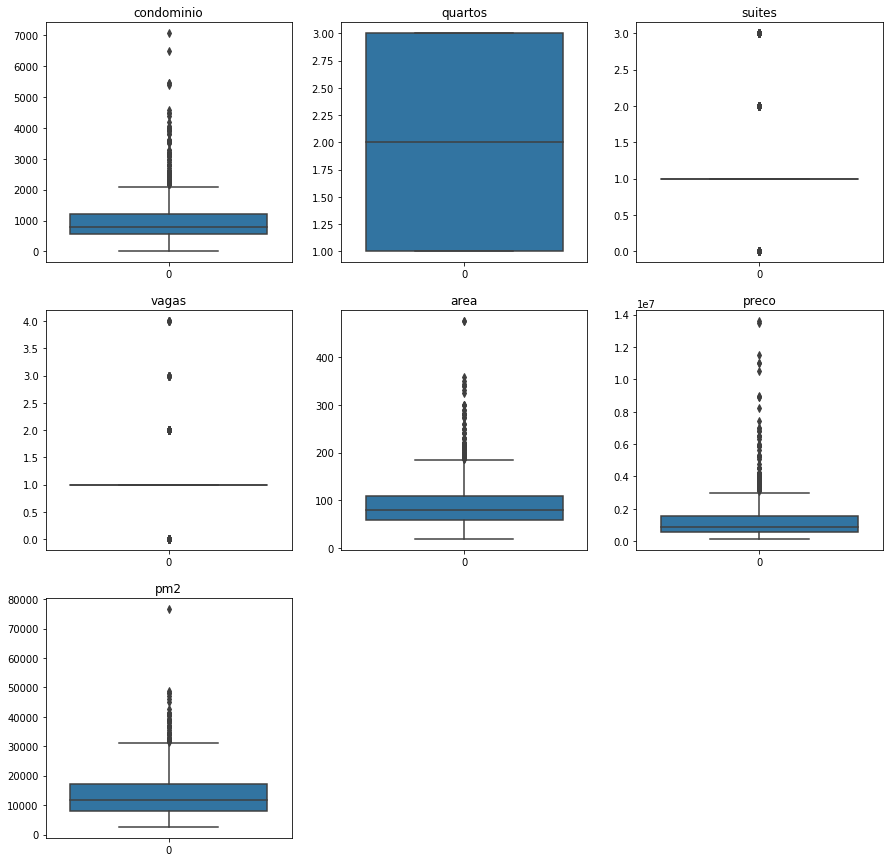

In [11]:
plt.figure(figsize=(15, 15))
ax=plt.subplot(331)
sns.boxplot(data=aptos['condominio'])
plt.title('condominio')
ax=plt.subplot(332)
sns.boxplot(data=aptos['quartos'])
plt.title('quartos')
ax=plt.subplot(333)
sns.boxplot(data=aptos['suites'])
plt.title('suites')
ax=plt.subplot(334)
sns.boxplot(data=aptos['vagas'])
plt.title('vagas')
ax=plt.subplot(335)
sns.boxplot(data=aptos['area'])
plt.title('area')
ax=plt.subplot(336)
sns.boxplot(data=aptos['preco'])
plt.title('preco')
ax=plt.subplot(337)
sns.boxplot(data=aptos['pm2'])
plt.title('pm2')
plt.show()

### Olhando as correlações graficamente

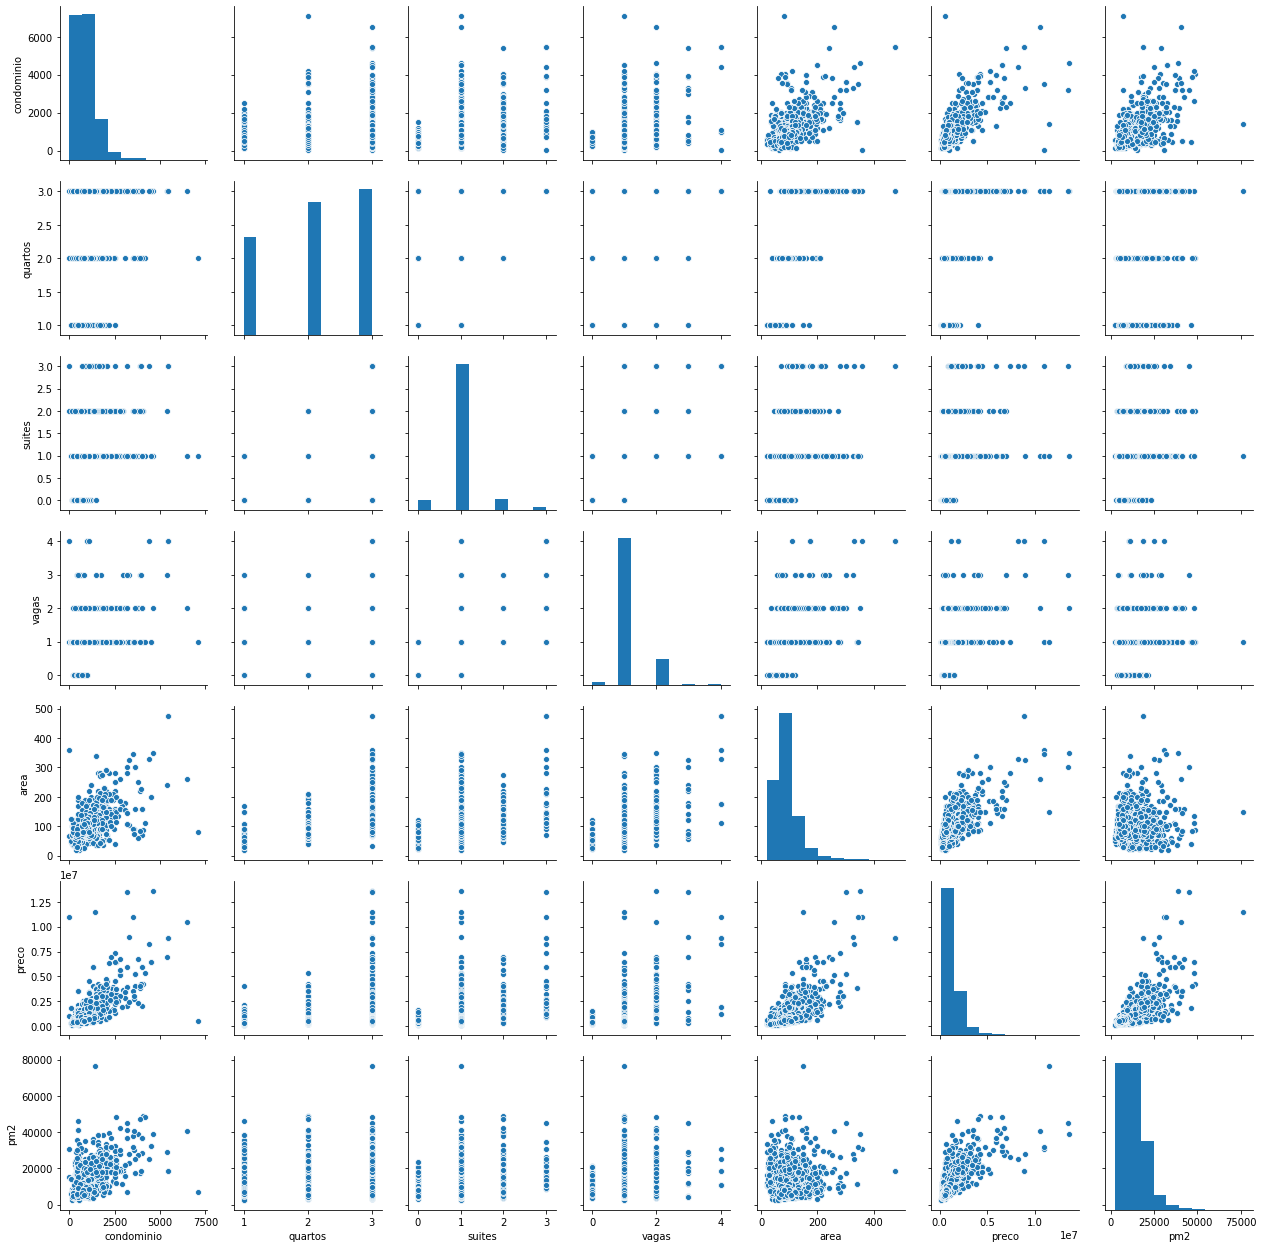

In [12]:
sns.pairplot(aptos)
plt.show()

### Scatterplot mostrando os preços por área nos diferentes bairros.
Note, pelas cores, que há um agrupamento de faixas de preços.

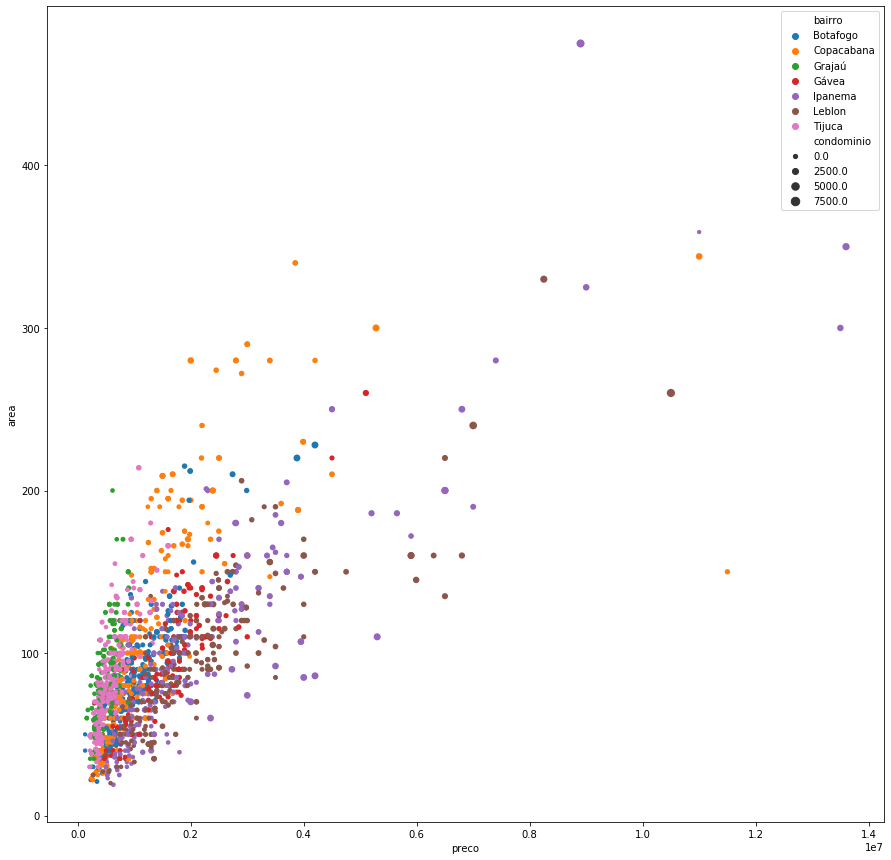

In [29]:
f, ax = plt.subplots(figsize=(15, 15))
ax1 = sns.scatterplot(x="preco", y="area",
                hue="bairro", size='condominio',
                linewidth=0,
                data=aptos, ax=ax)

## Preparação dos Dados

In [15]:
# Separar a variavel alvo (target) do conjunto de dados e converter para numpy.array
Y = aptos['pm2']
X = aptos.drop('pm2', axis=1)
feature_names = X.columns
#y = y.to_numpy()
#X = X.to_numpy()
print(X.shape, Y.shape)

(1997, 7) (1997,)


In [16]:
# Separar aleatoriamente 70% para treino, 15% para validacao e 15% para teste
X_train, X_temp, Y_train, Y_temp = train_test_split(X,Y,train_size=0.7,random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp,Y_temp,train_size=0.5,random_state=42)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

(1397, 7) (1397,) (300, 7) (300,) (300, 7) (300,)


### Veja no boxplot abaixo a necessidade de normalização
A feature preço se sobrepõe totalmente a todas as outras.

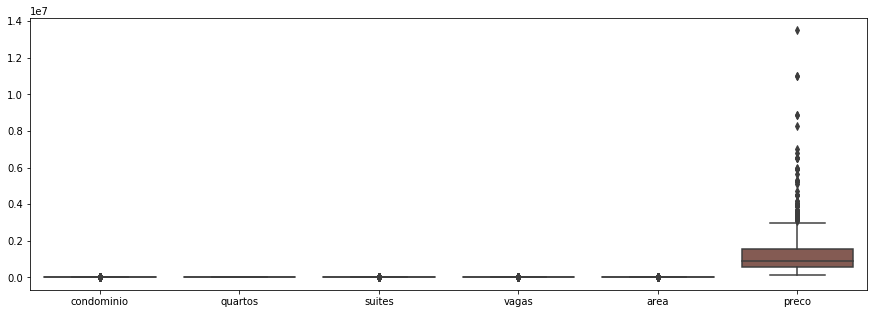

In [17]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=X_train)
plt.show()

## Modelo Baseline - Linear Regression - Todas as Features

In [19]:
X_train

,condominio,quartos,suites,vagas,area,bairro,preco
557,1850.0,3,2.0,1.0,130.0,Leblon,2750000.0
843,1200.0,3,1.0,1.0,160.0,Copacabana,1600000.0
1650,307.0,2,1.0,1.0,39.0,Grajaú,285000.0
1344,430.0,1,1.0,1.0,40.0,Botafogo,399000.0
1160,950.0,2,2.0,1.0,60.0,Leblon,1050000.0
1919,850.0,2,1.0,1.0,75.0,Tijuca,455000.0
286,1350.0,3,1.0,1.0,94.0,Gávea,1650000.0
1601,1160.0,3,1.0,1.0,103.0,Gávea,1500000.0
736,840.0,2,1.0,1.0,74.0,Botafogo,930000.0
598,750.0,2,1.0,1.0,63.0,Tijuca,670000.0


In [41]:
# transformar em numpy.array
x_train = X_train.to_numpy()
y_train = Y_train.to_numpy()
x_val = X_val.to_numpy()
y_val = Y_val.to_numpy()
x_test = X_test.to_numpy()
y_test = Y_test.to_numpy()

In [42]:
# índice dos atributos categóricos e numéricos
categ_atrib = [5]
num_atrib = [0,1,2,3,4,6]
print('numéricas', num_atrib)
print('categóricas', categ_atrib)

#fazer one-hot encoding da feature bairro; 
#usar drop first para evitar colinearidade na regressão linear
#one-hot encoding somente nas colunas categóricas e normalização z-norm nas numéricas
# onehotencoder transforma uma coluna em uma coluna de vetores binarios
enc = ColumnTransformer([('onehot',OneHotEncoder(sparse=False, handle_unknown='ignore',categories='auto'), 
                          categ_atrib),
                         ('z-norm',StandardScaler(), num_atrib)], verbose=True)

print(enc)
# nao pode fazer fit em dados de teste e validacao ********************
x_train = enc.fit_transform(x_train)
x_val = enc.transform(x_val)
x_test = enc.transform(x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

numéricas [0, 1, 2, 3, 4, 6]
categóricas [5]
ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('onehot',
                                 OneHotEncoder(categorical_features=None,
                                               categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               n_values=None, sparse=False),
                                 [5]),
                                ('z-norm',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 [0, 1, 2, 3, 4, 6])],
                  verbose=True)
[ColumnTransformer] ........ (1 of 2) Processing onehot, total=   0.0s
[ColumnTransformer] ........ (2 of 2) Pr

In [43]:
pd.DataFrame(x_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1.397000e+03,1.397000e+03,1.397000e+03,1.397000e+03,1.397000e+03,1.397000e+03
mean,0.156764,0.181102,0.114531,0.095920,0.144596,0.147459,0.159628,-6.866376e-17,6.103445e-17,5.086204e-18,1.487715e-16,-1.347844e-16,8.392237e-17
std,0.363709,0.385241,0.318569,0.294587,0.351819,0.354690,0.366392,1.000358e+00,1.000358e+00,1.000358e+00,1.000358e+00,1.000358e+00,1.000358e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.491930e+00,-1.425047e+00,-2.346606e+00,-2.451796e+00,-1.525454e+00,-9.859462e-01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.531167e-01,-1.425047e+00,-9.817763e-02,-3.335777e-01,-6.435179e-01,-5.845736e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.711435e-01,-1.714005e-01,-9.817763e-02,-3.335777e-01,-2.133049e-01,-2.991531e-01
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400135e-01,1.082246e+00,-9.817763e-02,-3.335777e-01,4.320145e-01,2.806072e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.310272e+00,1.082246e+00,4.398680e+00,6.021078e+00,8.283401e+00,1.093928e+01


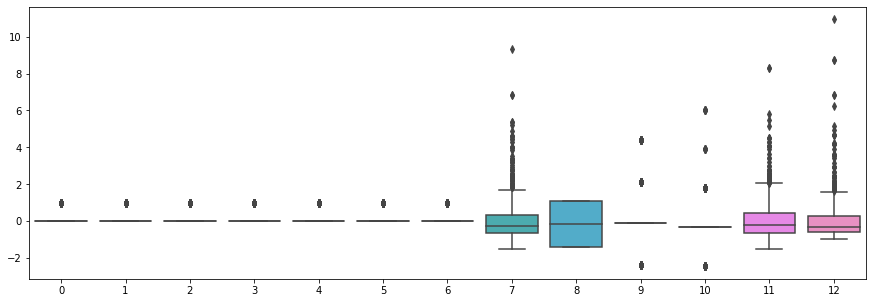

In [44]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=x_train)
plt.show()

In [51]:
# Criar o objeto de regressão linear
regr = linear_model.LinearRegression()

# Treinar o modelo usando os conjuntos de treino com as features e o target
regr.fit(x_train, y_train)

# Fazer as predições usando o conjunto de validação
yb_pred = regr.predict(x_val)

In [52]:
# Mostra os coeficientes
print('Coeficientes: \n', regr.coef_)
# Mostra o erro quadrado médio
print("Mean squared error: %.4f"
      % mean_squared_error(y_val, yb_pred))
# Coeficiente de Determinação Rˆ2 - r ao quadrado: 1 é a previsão perfeita  yval:valor real ybpred valor preditor
print('Coeficiente de Determinação: %.4f' % r2_score(y_val, yb_pred))

Coeficientes: 
 [-1.29402003e+16 -1.29402003e+16 -1.29402003e+16 -1.29402003e+16
 -1.29402003e+16 -1.29402003e+16 -1.29402003e+16  9.02408572e+02
  2.84542698e+02  3.35955916e+01  1.07113519e+02 -4.77864656e+03
  5.92498328e+03]
Mean squared error: 7277153.2268
Coeficiente de Determinação: 0.8337


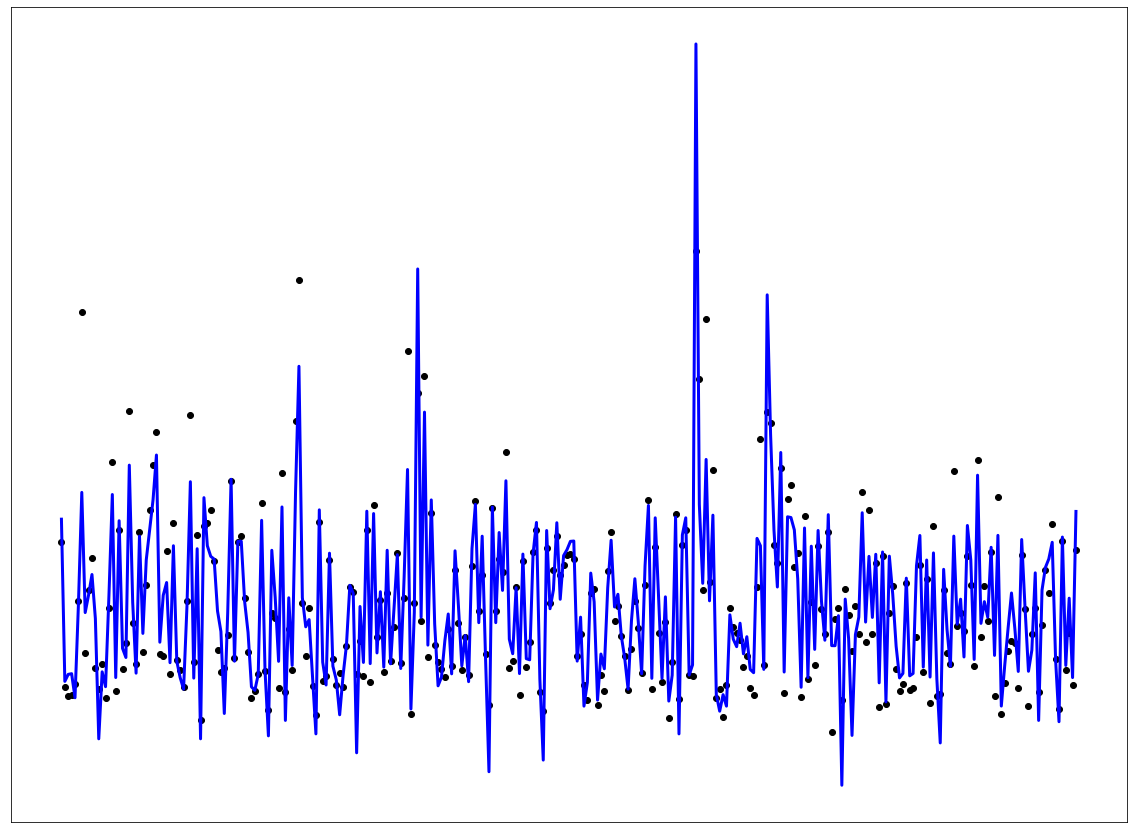

In [99]:
# Plota a saída
plt.figure(figsize=(20, 15))
x = list(range(len(x_val)))
plt.scatter(x, y_val,  color='black')
plt.plot(x, yb_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## LinearRegression - Redução de features para tentar melhorar o resultado

In [53]:
# Remover quartos, area, vagas e suites
x_train = X_train.drop(['quartos','suites', 'vagas'], axis=1).to_numpy()
x_val = X_val.drop(['quartos','suites', 'vagas'], axis=1).to_numpy()
x_test = X_test.drop(['quartos','suites', 'vagas'], axis=1).to_numpy()
print(x_train.shape, y_train.shape)

(1397, 4) (1397,)


In [54]:
# índice dos atributos categóricos e numéricos
categ_atrib = [2]
num_atrib = [0,1,3]
print('numéricas', num_atrib)
print('categóricas', categ_atrib)

#fazer one-hot encoding da feature bairro; 
#usar drop first para evitar colinearidade na regressão linear
#one-hot encoding somente nas colunas categóricas e normalização z-norm nas numéricas
enc = ColumnTransformer([('onehot',OneHotEncoder(sparse=False, handle_unknown='ignore'), categ_atrib),
                         ('z-norm',StandardScaler(), num_atrib)], verbose=True)

print(enc)
x_train = enc.fit_transform(x_train)
x_val = enc.transform(x_val)
x_test = enc.transform(x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

numéricas [0, 1, 3]
categóricas [2]
ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('onehot',
                                 OneHotEncoder(categorical_features=None,
                                               categories=None, drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               n_values=None, sparse=False),
                                 [2]),
                                ('z-norm',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 [0, 1, 3])],
                  verbose=True)
[ColumnTransformer] ........ (1 of 2) Processing onehot, total=   0.0s
[ColumnTransformer] ........ (2 of 2) Processing z-norm, tot

In [109]:
pd.DataFrame(x_train).describe()

,0,1,2,3,4,5,6,7,8,9
count,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1.397000e+03,1.397000e+03,1.397000e+03
mean,0.156764,0.181102,0.114531,0.095920,0.144596,0.147459,0.159628,-7.295524e-17,-1.365328e-16,7.164396e-17
std,0.363709,0.385241,0.318569,0.294587,0.351819,0.354690,0.366392,1.000358e+00,1.000358e+00,1.000358e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.491930e+00,-1.525454e+00,-9.859462e-01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.531167e-01,-6.435179e-01,-5.845736e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.711435e-01,-2.133049e-01,-2.991531e-01
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400135e-01,4.320145e-01,2.806072e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.310272e+00,8.283401e+00,1.093928e+01


In [55]:
# Criar o objeto de regressão linear
regrp = linear_model.LinearRegression()

# Treinar o modelo usando os conjuntos de treino com as features e o target
regrp.fit(x_train, y_train)

# Fazer as predições usando o conjunto de validaçao
yp_pred = regrp.predict(x_val)

In [56]:
# Mostra os coeficientes
print('Coeficientes: \n', regrp.coef_)
# Mostra o erro quadrado médio
print("Mean squared error: %.4f"
      % mean_squared_error(y_val, yp_pred))
# Coeficiente de Determinação Rˆ2 - r ao quadrado: 1 é a previsão perfeita
print('Coeficiente de Determinação: %.4f' % r2_score(y_val, yp_pred))

Coeficientes: 
 [-1.31560296e+16 -1.31560296e+16 -1.31560296e+16 -1.31560296e+16
 -1.31560296e+16 -1.31560296e+16 -1.31560296e+16  9.29538056e+02
 -4.50045177e+03  5.89133015e+03]
Mean squared error: 7363245.6543
Coeficiente de Determinação: 0.8317


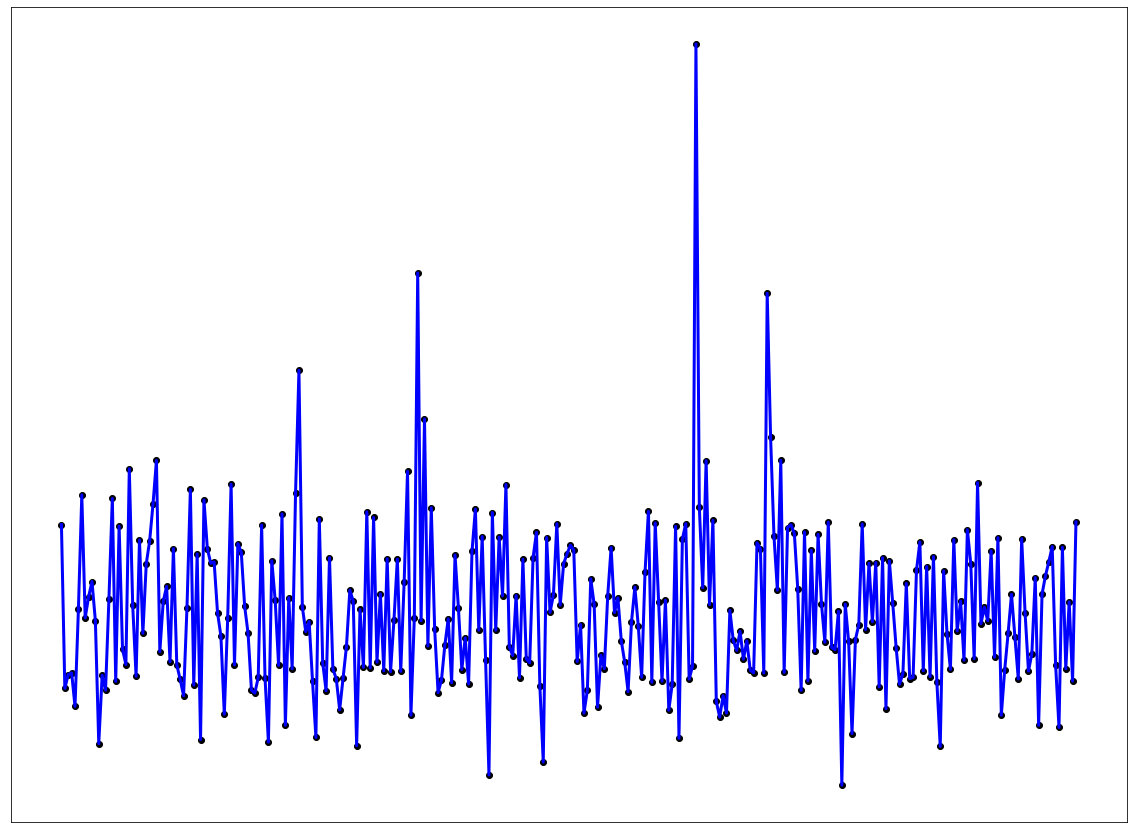

In [59]:
# Plota a saída
plt.figure(figsize=(20, 15))
x = list(range(len(x_val)))
plt.scatter(x, yp_pred,  color='black')
plt.plot(x, yp_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Outro Modelo: Gradient Boosting

In [65]:
# transformar em numpy.array
x_train = X_train.to_numpy()
y_train = Y_train.to_numpy()
x_val = X_val.to_numpy()
y_val = Y_val.to_numpy()
x_test = X_test.to_numpy()
y_test = Y_test.to_numpy()

In [66]:
# índice dos atributos categóricos e numéricos
categ_atrib = [5]
num_atrib = [0,1,2,3,4,6]
print('numéricas', num_atrib)
print('categóricas', categ_atrib)

#fazer ordinal encoding da feature bairro, pois o modelo é baseado em árvore; 
#normalização z-norm nas numéricas
# ordinal encoder é baseado em arvores e faz uma coluna ainda nao precisa quebrar em varias binarias
enc = ColumnTransformer([('ordinal',OrdinalEncoder(categories='auto'), categ_atrib),
                         ('z-norm',StandardScaler(), num_atrib)], verbose=True)

print(enc)
x_train = enc.fit_transform(x_train)
x_val = enc.transform(x_val)
x_test = enc.transform(x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

numéricas [0, 1, 2, 3, 4, 6]
categóricas [5]
ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('ordinal',
                                 OrdinalEncoder(categories='auto',
                                                dtype=<class 'numpy.float64'>),
                                 [5]),
                                ('z-norm',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 [0, 1, 2, 3, 4, 6])],
                  verbose=True)
[ColumnTransformer] ....... (1 of 2) Processing ordinal, total=   0.0s
[ColumnTransformer] ........ (2 of 2) Processing z-norm, total=   0.0s
(1397, 7)
(300, 7)
(300, 7)


In [67]:
# #############################################################################
# Fit regression model
params = {'n_estimators': 5000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = GradientBoostingRegressor(**params)

clf.fit(x_train, y_train)

ygbr_pred = clf.predict(x_val)

# Mostra o erro quadrado médio
print("Mean squared error: %.4f"
      % mean_squared_error(y_val, ygbr_pred))
# Coeficiente de Determinação Rˆ2 - r ao quadrado: 1 é a previsão perfeita
print('Coeficiente de Determinação: %.4f' % r2_score(y_val, ygbr_pred))

Mean squared error: 437339.4248
Coeficiente de Determinação: 0.9900


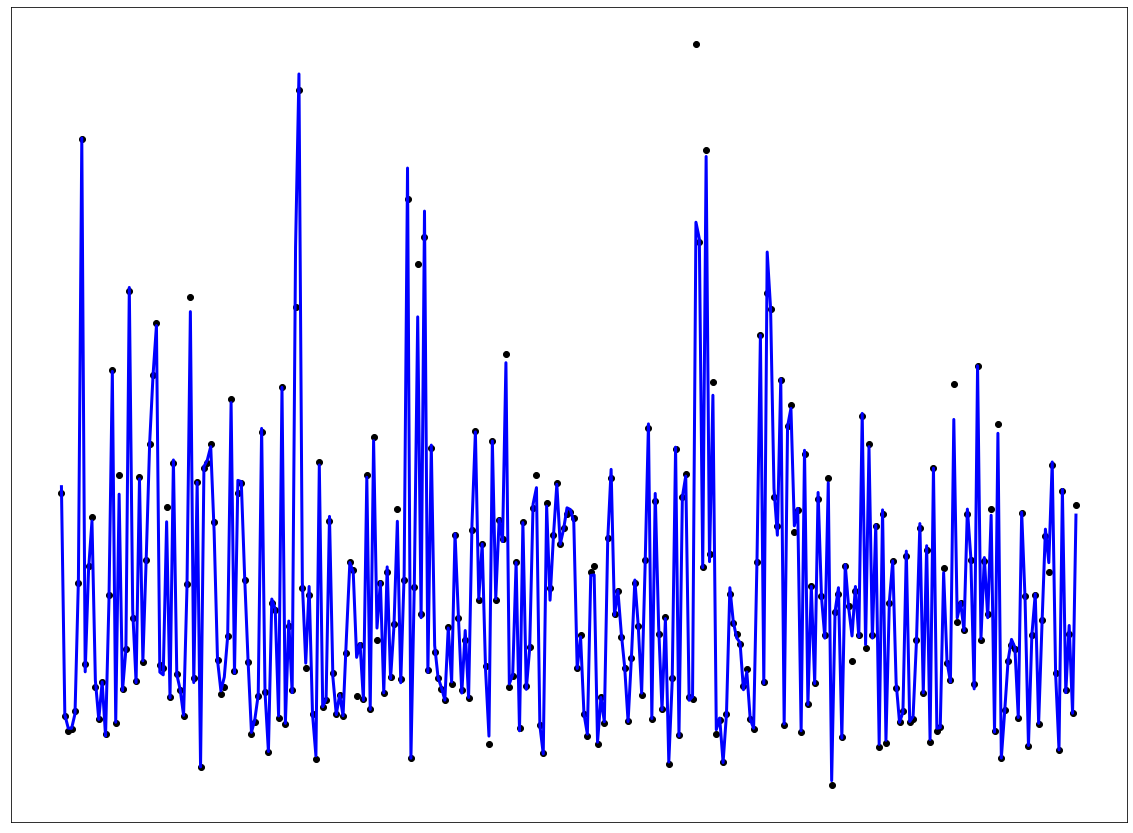

In [68]:
# Plota a saída
plt.figure(figsize=(20, 15))
x = list(range(len(x_val)))
plt.scatter(x, y_val,  color='black')
plt.plot(x, ygbr_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [69]:
# teste do melhor modelo
ygbr_pred_teste = clf.predict(x_test)

# Mostra o erro quadrado médio
print("Mean squared error: %.4f"
      % mean_squared_error(y_test, ygbr_pred_teste))
# Coeficiente de Determinação Rˆ2 - r ao quadrado: 1 é a previsão perfeita
print('Coeficiente de Determinação: %.4f' % r2_score(y_test, ygbr_pred_teste))

Mean squared error: 4333944.9067
Coeficiente de Determinação: 0.9308


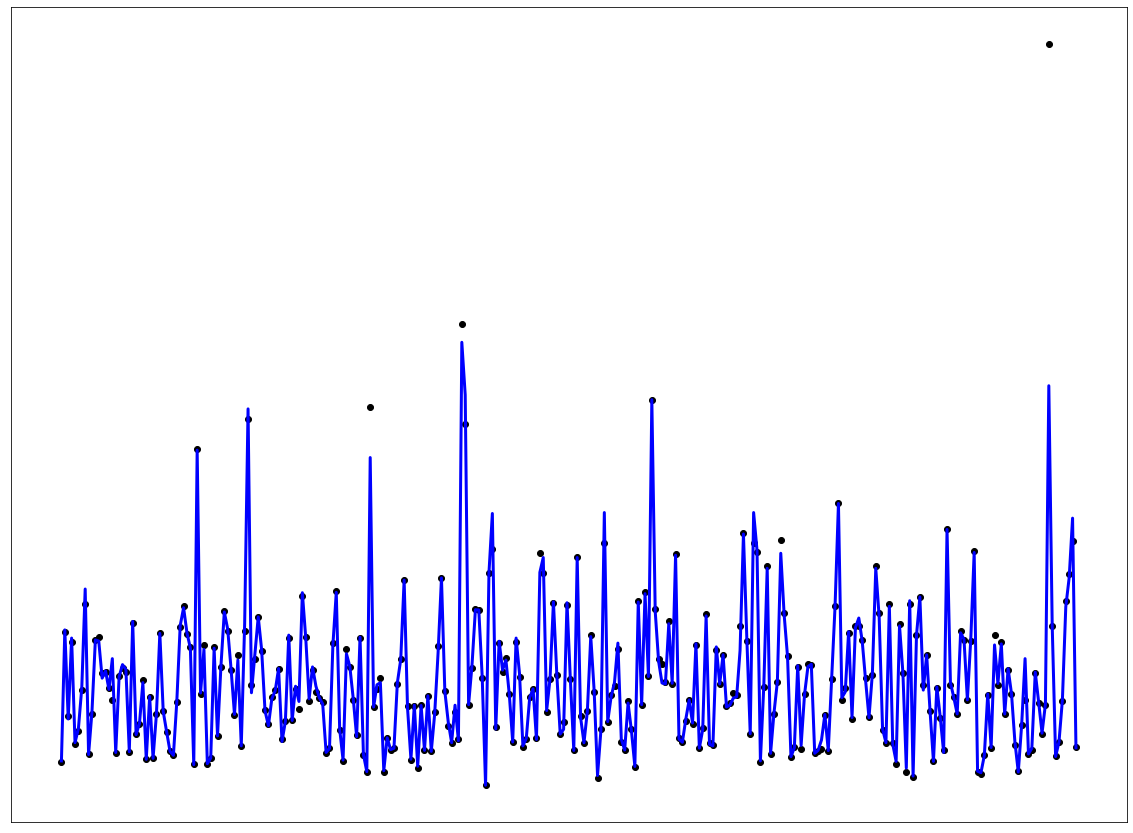

In [70]:
# Plota a saída
plt.figure(figsize=(20, 15))
x = list(range(len(x_test)))
plt.scatter(x, y_test,  color='black')
plt.plot(x, ygbr_pred_teste, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Text(0, 0.5, 'Deviance')

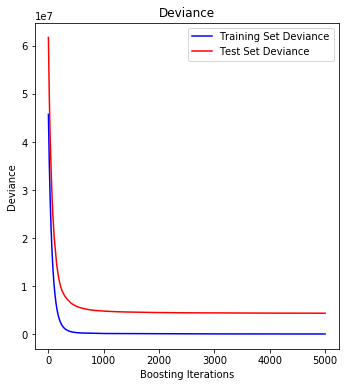

In [71]:
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, ygbr_pred_teste in enumerate(clf.staged_predict(x_test)):
    test_score[i] = clf.loss_(y_test, ygbr_pred_teste)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

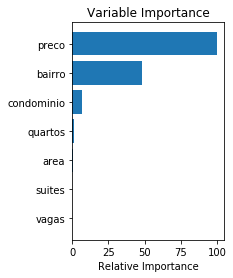

In [72]:
# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Conclusão

O melhor modelo foi o GradientBoosting, conseguindo um R2 de 0.99 em validação e 0.93 em testes. A análise de perdas mostra que não há sobreajuste (overfiting). <br>
Nos modelos de LinearRegression a redução de features não trouxe melhora, mas manteve o resultado. A baixa contribuição de quartos, suites e vagas foi confirmada na análise de importância das variáveis do modelo GradientBoosting.